## Final Project Submission

Please fill out:
* Student name: Calvine Dasilver
* Student pace: full time
* Scheduled project review date/time: N/A
* Instructor name: Nikita
* Blog post URL:


# BOX OFFICE INSIGHTS FOR MICROSOFT STUDIOS 

## 1. INTRODUCTION
## 1.1 Overview


 This document outlines the initial steps for Microsoft's foray into the film industry. Recognizing the growing trend of original content creation, Microsoft aims to establish a new movie studio. However, lacking film industry expertise, they require market research to guide their content strategy.          

## 1.2 Objectives

### a) General Objective
  
  
  
  Through exploration and analysis of top-performing films at the box office, this project aims to provide actionable insights for Microsoft's new movie studio regarding film genre selection.


### b) Specific Objectives




 <li> Data understanding

 <li> Importing useful libraries

 <li> Retrieving data from a DataFrame

 <li> Data cleaning

 <li> Exploratory data analysis

 <li> Data visualization
 
 <li> Conclusions and Recommendations

## 2.Data Source

#### In the folder '_zippedData_' are movie datasets from:

i. Box Office MojoLinks to an external site.

ii. IMDBLinks to an external site.

iii. Rotten TomatoesLinks to an external site.

iv. TheMovieDBLinks to an external site.

v. The NumbersLinks to an external site.

#### Features of IMDB dataset consist of 8 tables 

| indexes | Table |
|---|---|
| 1. | movie_basics |
| 2. | Known_for |
| 3. | Movie_akas |
| 4. | Movie_ratings |
| 5. | directors |
| 6. | Persons |
| 7. | Principals |
| 8. | Writers |


## <li> Data Understanding


The dataset used for this project contains information about film box office revenues including variables such as release dates, genres, budgets and revenues. Explanatory data analysis techniques will be used to get clear understanding of the dataset including handling missing values, checking data types, identifying outliers and placeholder values and also extracting relevant features for analysis.

## <li> Importing Usefull Libraries

Import libraries with aliases for data manipulation

In [62]:
# Your code here
import pandas as pd
import numpy as np
import sqlite3
import csv
import json
from datetime import datetime

## 2.1 Importing the datasets

#### Datasets:

movie_gross_df = pd.read_csv('zippedData\\bom.movie_gross.csv.gz')

movie_budgets_df = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')

tmdb_movies_df = pd.read_csv('zippedData\\tmdb.movies.csv.gz',index_col=0)


##### 2.1.1 Loading the data from "movie_gross.csv" and exploring

The "bom dataset" provides details about how much money movies made at the box office, both domestically (in the country where the movie was produced) and in foreign markets (outside the movie's home country). This dataset typically includes information such as the title of the movie, the amount of money it earned domestically, and the amount it earned in foreign markets. This information can be useful for understanding the financial success of movies and analyzing trends in the film industry.

In [63]:
#Load the data from bom.movie_gross.csv into a dataframe
movie_gross_df = pd.read_csv('zippedData\\bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<li> Retrieving data from a DataFrame

In [64]:
#shape of the dataframe
movie_gross_df.shape

(3387, 5)

In [65]:
#find the information of the dataframe
movie_gross_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [66]:
#find the overview of the domestic_gross
movie_gross_df['domestic_gross'].describe()


count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [67]:
#find the overview of the foreign_gross
movie_gross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [68]:
#number of studios in the dataframe
movie_gross_df['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
KC              1
PBS             1
CineGalaxy      1
MPFT            1
Indic.          1
Name: studio, Length: 257, dtype: int64

In [69]:
#the year duration
movie_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [70]:
#drop the rows without gross values
movie_gross_df.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [71]:
#adding id column
movie_gross_df['id'] = range(1, len( movie_gross_df) + 1)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year,id
0,Toy Story 3,BV,415000000.0,652000000,2010,1
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,2
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,3
3,Inception,WB,292600000.0,535700000,2010,4
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,5
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,2005
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,2006
3309,Time Freak,Grindstone,10000.0,256000,2018,2007
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,2008


In [72]:
#check for missing values
missing_values = movie_gross_df[['domestic_gross', 'foreign_gross']].isnull().sum()
missing_values

domestic_gross    0
foreign_gross     0
dtype: int64

In [73]:
(movie_gross_df['foreign_gross'].dtype)

dtype('O')

In [74]:
# Remove commas and convert the foreign_gross column to float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

In [75]:
# Fill missing values with the median
movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median(), inplace=True)

# Now, perform aggregation again
movie_gross_df[['domestic_gross', 'foreign_gross']].agg(['median', 'mean'])


,domestic_gross,foreign_gross
median,1.650000e+07,1.930000e+07
mean,4.697311e+07,7.571822e+07


##### 2.1.2 Loading the data from "movie_budgets.csv" and exploring

In other aspect, lets call it the "numbers dataset".The "Numbers dataset" provides data on the financial aspects of various projects or investments, specifically focusing on budgets and returns. This dataset typically includes information such as the initial budget allocated for a project or investment, as well as the returns or profits generated from it. By analyzing this data, one can gain insights into the financial performance of different projects or investments and make informed decisions regarding resource allocation, profitability, and risk management.






In [76]:
#Load the data from tn.movie_budgets.csv into a dataframe
movie_budgets_df = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [77]:
movie_budgets_df.shape #checking the total number of records and series

(5782, 6)

In [78]:
# converting data from one type (typically a string or object) to a numeric type (such as integer or float)
# Define the columns to be converted
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Convert each column to numeric type
for column in columns_to_convert:
    movie_budgets_df[column] = movie_budgets_df[column].replace('[^.0-9]', '', regex=True).astype('float')

movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [79]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [80]:
#find the overview of the dataframe 'movie_budgets_df
movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [81]:
#Displaying the mean and median for 'production_budget','domestic_gross','worldwide_gross'
movie_budgets_df[['production_budget','domestic_gross','worldwide_gross']].agg(['median', 'mean'])

,production_budget,domestic_gross,worldwide_gross
median,1.700000e+07,1.722594e+07,2.798445e+07
mean,3.158776e+07,4.187333e+07,9.148746e+07


To find out the budget of a movie, we start by determining the international gross. We calculate the international gross by subtracting the domestic gross (the money the movie made in its home country) from the worldwide gross (the total money the movie made globally). This calculation gives us an estimate of how much money the movie earned outside of its home country.

In [82]:
movie_budgets_df['international_gross'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['domestic_gross']
cols = list(movie_budgets_df.columns)

movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1.920130e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00


if the release date in your dataset is stored as an object (usually meaning it's in a text format), and you want to filter or perform operations based on the year, you need to convert it to a datetime type. This conversion allows you to manipulate the dates more easily, such as extracting the year or filtering data based on specific years.






In [83]:
#your code here
movie_budgets_df['year'] = pd.to_datetime(movie_budgets_df['release_date'], errors='coerce').dt.strftime('%Y')
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,2018
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1.920130e+05,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,2015


<li> Data cleaning

Since now we know the insights of our dataset 'movie_bugets' lets filter unwanted values from our dataframe

In [84]:

movie_budgets_df['release_date'].value_counts(ascending= False)

Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2013    13
                ..
Sep 30, 2019     1
Mar 1, 1995      1
Mar 29, 2018     1
Jul 11, 2012     1
Apr 21, 1995     1
Name: release_date, Length: 2418, dtype: int64

In [85]:
#taking data from the year 2015 for our budgeting
movie_budgets_df['year'] = movie_budgets_df['year'].astype(int)
movies_budget_df = movie_budgets_df[(movie_budgets_df['year'] >= 2015) & (movie_budgets_df['year'] <= 2022)]
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5782 non-null   int64  
 1   release_date         5782 non-null   object 
 2   movie                5782 non-null   object 
 3   production_budget    5782 non-null   float64
 4   domestic_gross       5782 non-null   float64
 5   worldwide_gross      5782 non-null   float64
 6   international_gross  5782 non-null   float64
 7   year                 5782 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 338.9+ KB


In [86]:
movie_budgets_df['year'].value_counts()

2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1947      1
1927      1
1941      1
1937      1
1915      1
Name: year, Length: 96, dtype: int64

In [87]:
movie_budgets_df.sort_values('worldwide_gross',inplace =True)

Removing rows from the dataset where there are no values provided for the domestic gross, international gross, and worldwide gross columns. This operation helps clean the data by eliminating incomplete or missing information, ensuring that only complete records with all necessary financial information are retained for analysis.

In [88]:
movie_budgets_df = movie_budgets_df[(movie_budgets_df['domestic_gross'] != 0) | 
(movie_budgets_df['worldwide_gross'] != 0)]
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
5302,3,"Dec 11, 2015",American Hero,1000000.0,0.0,2.600000e+01,2.600000e+01,2015
5335,36,"Nov 21, 2014",Food Chains,913000.0,0.0,1.760000e+02,1.760000e+02,2014
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000.0,401.0,4.010000e+02,0.000000e+00,2008
5518,19,"Oct 13, 2005",The Dark Hours,400000.0,423.0,4.230000e+02,0.000000e+00,2005
5383,84,"Dec 31, 2014",Destiny,750000.0,0.0,4.500000e+02,4.500000e+02,2014
...,...,...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,2015
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,1997


In [89]:
#write a code that calculates the percentage profit of movies by comparing their production budget 
#to their worldwide gross revenue

#your code here
movie_budgets_df['profit/loss'] = (movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']).astype(int)
movie_budgets_df

<ipython-input-89-8eb650f069db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_df['profit/loss'] = (movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']).astype(int)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year,profit/loss
5302,3,"Dec 11, 2015",American Hero,1000000.0,0.0,2.600000e+01,2.600000e+01,2015,-999974
5335,36,"Nov 21, 2014",Food Chains,913000.0,0.0,1.760000e+02,1.760000e+02,2014,-912824
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000.0,401.0,4.010000e+02,0.000000e+00,2008,-9599
5518,19,"Oct 13, 2005",The Dark Hours,400000.0,423.0,4.230000e+02,0.000000e+00,2005,-399577
5383,84,"Dec 31, 2014",Destiny,750000.0,0.0,4.500000e+02,4.500000e+02,2014,-749550
...,...,...,...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08,2015,1433854864
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,2018,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,2015,1747311220
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,1997,2008208395


##### 2.1.3 Loading the data from "tmdb.movies.csv.gz" and exploring

 The "tmdb.movies dataset" provides information about how popular a movie is, relative to the language in which it is spoken.






In [90]:
#Load the data from bom.movie_gross.csv into a dataframe
tmdb_movies_df = pd.read_csv('zippedData\\tmdb.movies.csv.gz',index_col=0)
tmdb_movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [91]:
#your code here
print(f'it has:{tmdb_movies_df.shape}')


it has:(26517, 9)


In [92]:
#your code here
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [93]:
#your code here
tmdb_movies_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [94]:
#lets check the language column
tmdb_movies_df['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
af        1
cy        1
hz        1
ky        1
sl        1
Name: original_language, Length: 76, dtype: int64

In [95]:
#drop all duplicate rows based on the titles columns
tmdb_movies_df = tmdb_movies_df.drop_duplicates(subset=['title', 'original_title'], keep='first').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24842 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24842 non-null  object 
 1   id                 24842 non-null  int64  
 2   original_language  24842 non-null  object 
 3   original_title     24842 non-null  object 
 4   popularity         24842 non-null  float64
 5   release_date       24842 non-null  object 
 6   title              24842 non-null  object 
 7   vote_average       24842 non-null  float64
 8   vote_count         24842 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


## 3. Merging the cleaned dataframes
To remind ourselves, we have 3 dataframes

<li> movie_gross_df
<li> movie_budgets_df
<li> tmdb_movies_df

We merge the dataframes using below code and display the figures in 2 decimal places:


In [96]:
# we have two dataframes which are not a <class 'NoneType'> : df1, df2 
# the two dataframes: movie_gross_df and movie_budgets_df

# Merge the dataframes using an appropriate column as the key
merged_df = pd.merge(movie_gross_df, movie_budgets_df, on='id', how='inner')

# Display the merged dataframe with figures rounded to 2 decimal places
rounded_merged_df = merged_df.round(2)
print(rounded_merged_df)

            title studio  domestic_gross_x  foreign_gross  year_x   id  \
0     Toy Story 3     BV       415000000.0    652000000.0    2010    1   
1     Toy Story 3     BV       415000000.0    652000000.0    2010    1   
2     Toy Story 3     BV       415000000.0    652000000.0    2010    1   
3     Toy Story 3     BV       415000000.0    652000000.0    2010    1   
4     Toy Story 3     BV       415000000.0    652000000.0    2010    1   
...           ...    ...               ...            ...     ...  ...   
5410      Cop Out     WB        44900000.0     10700000.0    2010  100   
5411      Cop Out     WB        44900000.0     10700000.0    2010  100   
5412      Cop Out     WB        44900000.0     10700000.0    2010  100   
5413      Cop Out     WB        44900000.0     10700000.0    2010  100   
5414      Cop Out     WB        44900000.0     10700000.0    2010  100   

      release_date                                 movie  production_budget  \
0     Dec 14, 2018              

In [97]:
rounded_merged_df.head()

,title,studio,domestic_gross_x,foreign_gross,year_x,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,international_gross,year_y,profit/loss
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,1447.0,0.0,2018,-648553
1,Toy Story 3,BV,415000000.0,652000000.0,2010,1,"Dec 31, 2015",Karachi se Lahore,1000000.0,0.0,17721.0,17721.0,2015,-982279
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,39659.0,81371.0,41712.0,2003,-1018629
3,Toy Story 3,BV,415000000.0,652000000.0,2010,1,"Mar 22, 2002",Stolen Summer,1500000.0,119841.0,119841.0,0.0,2002,-1380159
4,Toy Story 3,BV,415000000.0,652000000.0,2010,1,"May 30, 2008",The Foot Fist Way,79000.0,234286.0,234286.0,0.0,2008,155286


In [98]:
rounded_merged_df.shape

(5415, 14)

In [99]:
rounded_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5414
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                5415 non-null   object 
 1   studio               5415 non-null   object 
 2   domestic_gross_x     5415 non-null   float64
 3   foreign_gross        5415 non-null   float64
 4   year_x               5415 non-null   int64  
 5   id                   5415 non-null   int32  
 6   release_date         5415 non-null   object 
 7   movie                5415 non-null   object 
 8   production_budget    5415 non-null   float64
 9   domestic_gross_y     5415 non-null   float64
 10  worldwide_gross      5415 non-null   float64
 11  international_gross  5415 non-null   float64
 12  year_y               5415 non-null   int32  
 13  profit/loss          5415 non-null   int32  
dtypes: float64(6), int32(3), int64(1), object(4)
memory usage: 571.1+ KB


<li> Data Cleaning

In [100]:
# dropping the unnecessary columns

rounded_merged_df.drop(columns=['id','year_x','domestic_gross_x','domestic_gross_y','year_y'],inplace = True)

In [101]:
rounded_merged_df.head()

,title,studio,foreign_gross,release_date,movie,production_budget,worldwide_gross,international_gross,profit/loss
0,Toy Story 3,BV,652000000.0,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,0.0,-648553
1,Toy Story 3,BV,652000000.0,"Dec 31, 2015",Karachi se Lahore,1000000.0,17721.0,17721.0,-982279
2,Toy Story 3,BV,652000000.0,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,81371.0,41712.0,-1018629
3,Toy Story 3,BV,652000000.0,"Mar 22, 2002",Stolen Summer,1500000.0,119841.0,0.0,-1380159
4,Toy Story 3,BV,652000000.0,"May 30, 2008",The Foot Fist Way,79000.0,234286.0,0.0,155286


In [102]:
#checking for the number of unique values in each column of the DataFrame rounded_merged_df.
rounded_merged_df.nunique()

title                   100
studio                   19
foreign_gross            98
release_date           2291
movie                  5339
production_budget       486
worldwide_gross        5355
international_gross    4006
profit/loss            5385
dtype: int64

In [103]:
# checking for null values
rounded_merged_df.isna().sum()

title                  0
studio                 0
foreign_gross          0
release_date           0
movie                  0
production_budget      0
worldwide_gross        0
international_gross    0
profit/loss            0
dtype: int64

In [104]:
# checking for duplicates in the 'movie' column

rounded_merged_df.duplicated(['movie']).sum()

76

In [105]:
#drop the duplicates in the 'movie' column
rounded_merged_df.drop_duplicates(subset= ['movie'] ,inplace=True)
rounded_merged_df.duplicated(['movie']).sum()

0

In [106]:
#removing the rows from the dataset where the values in columns is null or missing
#your code here
rounded_merged_df.dropna(inplace=True)
rounded_merged_df.isna().sum()

title                  0
studio                 0
foreign_gross          0
release_date           0
movie                  0
production_budget      0
worldwide_gross        0
international_gross    0
profit/loss            0
dtype: int64

In [107]:
rounded_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5339 entries, 0 to 5414
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                5339 non-null   object 
 1   studio               5339 non-null   object 
 2   foreign_gross        5339 non-null   float64
 3   release_date         5339 non-null   object 
 4   movie                5339 non-null   object 
 5   production_budget    5339 non-null   float64
 6   worldwide_gross      5339 non-null   float64
 7   international_gross  5339 non-null   float64
 8   profit/loss          5339 non-null   int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 396.3+ KB


Summary of the Merged dataframe

*The resulting merged DataFrame has 5339 rows and 9 columns.

*The data types are 3 : float,int,object.

*We have no null figures in our data set.

*The columns have been appropriately merged and are all indicated above.

*The data occupies 396.3+ KB

 Saving the combined DataFrame into a CSV (Comma-Separated Values) file format. This action involves writing the contents of the DataFrame to a file in CSV format so that it can be easily shared, analyzed, or imported into other software applications.

In [108]:
#your code here
rounded_merged_df.to_csv('Enhanced Microsoft Data.csv')

## 4. Statistical Analysis and Visualization
<li> This involves generating summary statistics for the merged DataFrame.
<li> We'll use the DataFrame's describe() method to generate descriptive statistics for the numerical columns, and we'll also create visualizations to explore the data distribution and relationships within the columns.
<li> Finally,we will employ graphical representations, such as histograms, box plots, scatter plots, and bar charts, to visually depict the statistical properties and relationships present in the dataset.

In [109]:
#To enable us to visualize, we require to import Seaborn and Matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
rounded_merged_df

,title,studio,foreign_gross,release_date,movie,production_budget,worldwide_gross,international_gross,profit/loss
0,Toy Story 3,BV,652000000.0,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,0.0,-648553
1,Toy Story 3,BV,652000000.0,"Dec 31, 2015",Karachi se Lahore,1000000.0,17721.0,17721.0,-982279
2,Toy Story 3,BV,652000000.0,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,81371.0,41712.0,-1018629
3,Toy Story 3,BV,652000000.0,"Mar 22, 2002",Stolen Summer,1500000.0,119841.0,0.0,-1380159
4,Toy Story 3,BV,652000000.0,"May 30, 2008",The Foot Fist Way,79000.0,234286.0,0.0,155286
...,...,...,...,...,...,...,...,...,...
5410,Cop Out,WB,10700000.0,"Dec 9, 1988",Twins,15000000.0,216600000.0,104663612.0,201600000
5411,Cop Out,WB,10700000.0,"Jan 18, 2019",Glass,20000000.0,245303505.0,134268500.0,225303505
5412,Cop Out,WB,10700000.0,"Nov 8, 1996",Ransom,70000000.0,308700000.0,172207319.0,238700000
5413,Cop Out,WB,10700000.0,"Jun 16, 1999",Tarzan,145000000.0,448191819.0,277100000.0,303191819


In [111]:
rounded_merged_df[['release_date','movie']].describe()

,release_date,movie
count,5339,5339
unique,2262,5339
top,"Dec 31, 2015",Churchill
freq,10,1


 This code will create a line plot showing the count of movies released on different dates

In [112]:

sns.lineplot(data=rounded_merged_df['release_date'].value_counts(), color="black")

# Add a title
plt.title("Line Plot of Movie Counts Over Release Dates")
# Add labels
plt.xlabel("Release Date")
plt.ylabel("Movie Count")
# Show the plot
plt.show()

By looking at the line's trajectory, you can potentially identify trends in movie release patterns over time. For example, a steadily increasing line suggests a rise in movie production over the years, while a fluctuating line might indicate variations in release numbers.
Overall, the visualization suggests that movie production hasn't necessarily followed a constant upward trend. Instead, there have been variations in the number of movies released across the depicted release dates.

Changing the ['foreign_gross', 'production_budget', 'worldwide_gross', 'international_gross', 'profit/loss'] columns to one currency USD

In [ ]:
 
# Define exchange rate
exchange_rate = 1.23  # Example exchange rate (replace with actual rate)

# Columns to convert to USD
columns_to_convert = ['foreign_gross', 'production_budget', 'worldwide_gross', 'international_gross', 'profit/loss']

# Convert columns to USD
rounded_merged_df[columns_to_convert] *= exchange_rate

# Describe the new columns
rounded_merged_df[columns_to_convert].describe()

,foreign_gross,production_budget,worldwide_gross,international_gross,profit/loss
count,5.339000e+03,5.339000e+03,5.339000e+03,5.339000e+03,5.339000e+03
mean,1.627600e+08,4.078321e+07,1.195807e+08,6.484768e+07,7.776103e+07
std,1.756227e+08,5.205857e+07,2.200204e+08,1.429421e+08,1.840971e+08
min,6.605100e+05,1.353000e+03,3.198000e+01,0.000000e+00,-2.641405e+09
25%,5.584200e+07,7.380000e+06,8.610000e+06,2.082390e+04,-2.324108e+06
50%,9.298800e+07,2.337000e+07,4.055144e+07,1.040262e+07,1.436443e+07
75%,2.154960e+08,5.043000e+07,1.279153e+08,6.309288e+07,8.247238e+07
max,8.502990e+08,5.227500e+08,3.414905e+09,2.479480e+09,2.470096e+09


The mean production budget is about USD 40.7 million, with a standard deviation of about USD 52 million this indicates that the data is quite spread out around the mean.
The minimum production budget is about USD 1,353 and the maximum production budget is about USD 504 million.
The median for production budget used is 23.3 million which falls between the 25% percentile of USD 7.3 million and the 75th percentile of USD 50.4 million.

Text(0.5, 1.0, 'Boxplot of Production Budget')

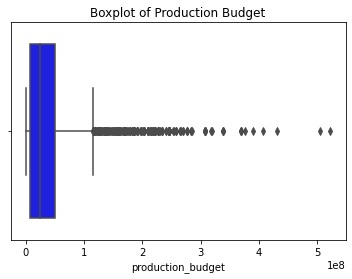

In [ ]:
# Create the boxplot
sns.boxplot(data=rounded_merged_df, x='production_budget', color='blue')

# Add a title
plt.title("Boxplot of Production Budget")

# Show the ploplt.show()

 By plotting 'foreign', 'worldwide', and 'international' grosses on the same bar chart, you can visually compare the total gross values across these categories.This comparison allows you to see the contribution of each category to the overall gross revenue.
 Comparing the grosses in this way can provide insights into various aspects such as:

<li> The distribution of revenue across different markets (foreign vs. international vs. worldwide).

<li> The relative importance of each market segment in contributing to the total revenue.
<li> Any disparities or patterns in revenue generation across these categories.
<li> Overall, visualizing and comparing the grosses in this manner can help in understanding the revenue dynamics and making informed decisions related to marketing strategies, distribution channels, and target audiences.

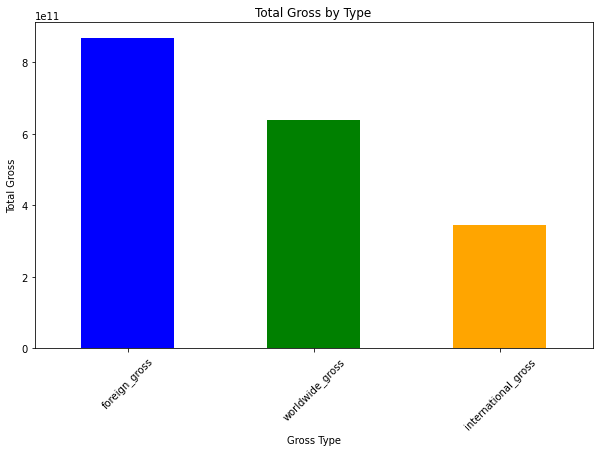

In [ ]:
# Create a new column representing the sum of foreign_gross, worldwide_gross, and international_gross
rounded_merged_df['total_gross'] = rounded_merged_df['foreign_gross'] + rounded_merged_df['worldwide_gross'] + rounded_merged_df['international_gross']

# Plotting a bar chart
plt.figure(figsize=(10, 6))
rounded_merged_df[['foreign_gross', 'worldwide_gross', 'international_gross']].sum().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel('Gross Type')
plt.ylabel('Total Gross')
plt.title('Total Gross by Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
rounded_merged_df['movie'].head(40)

0                    That Way Madness Lies
1                        Karachi se Lahore
2     Dracula: Pages from a Virgin's Diary
3                            Stolen Summer
4                        The Foot Fist Way
5                              The Tempest
6                               Swept Away
7                            The Messenger
8                                Beautiful
9                                 Slackers
10               What Planet Are You From?
11              It's Kind of a Funny Story
12                      DOA: Dead or Alive
13                                  Lolita
14                           The Dark Half
15                       Winter in Wartime
16                               3 Strikes
17                           The Collector
18                         The Nun's Story
19                      Dead Man on Campus
20                         American Dreamz
21                                   Mommy
22              The World's Fastest Indian
23         

In [ ]:
rounded_merged_df['title']

0       Toy Story 3
1       Toy Story 3
2       Toy Story 3
3       Toy Story 3
4       Toy Story 3
           ...     
5410        Cop Out
5411        Cop Out
5412        Cop Out
5413        Cop Out
5414        Cop Out
Name: title, Length: 5339, dtype: object

The bar plot displays the average profit or loss for each movie studio. Each bar represents a studio, and its height represents the average profit or loss across all movies produced by that studio. The x-axis denotes the studio names, while the y-axis represents the average profit or loss value. By observing the bar heights, you can compare the profitability of different studios, as higher bars indicate higher average profits and vice versa.

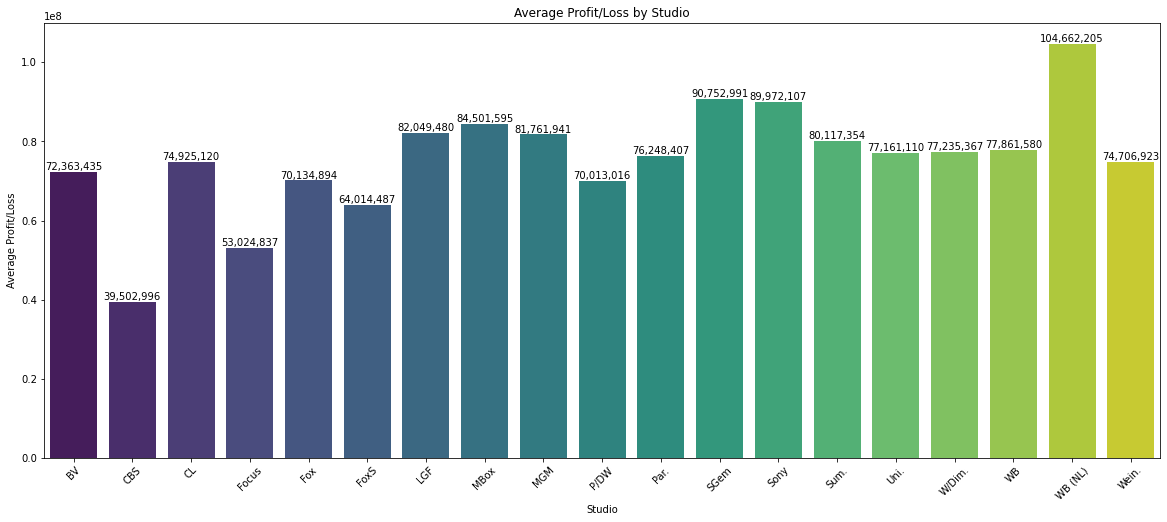

In [ ]:
# Calculate average profit/loss for each studio
average_profit_loss = rounded_merged_df.groupby('studio')['profit/loss'].mean().reset_index()

# Plotting a bar plot
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=average_profit_loss, x='studio', y='profit/loss', palette='viridis')

# Add labels to the bars
for i, value in enumerate(average_profit_loss['profit/loss']):
    ax.text(i, value, f"{value:,.0f}", ha='center', va='bottom')

plt.xlabel('Studio')
plt.ylabel('Average Profit/Loss')
plt.title('Average Profit/Loss by Studio')
plt.xticks(rotation=45)
plt.show()

## 4. Overview of Findings.

Our exploration of "rounded_merged_df" yielded some noteworthy insights:



<li> The movies released overtime(years) shows that,by looking at the line's trajectory, you can potentially identify trends in movie release patterns over time. For example, a steadily increasing line suggests a rise in movie production over the years, while a fluctuating line might indicate variations in release numbers.
Overall, the visualization suggests that movie production hasn't necessarily followed a constant upward trend. Instead, there have been variations in the number of movies released across the depicted release dates.


<li> According to our production budget findings;

###### -Average Budget:

The average production budget is around $40.7 million (mean). This is like the "center point" of all the movie budgets.

###### -Spread of Budgets:

The standard deviation is about $52 million. 
This is a big number compared to the average,which tells us that movie budgets are quite spread out. Some movies cost much more than $40.7 million to make, while others cost much less.
Another way to see the spread is by looking at the minimum ($1,353) and maximum ($504 million) budgets. These show the extremes of how much movies can cost to produce.

###### -Middle Budget:

The median is $23.3 million.
This is the budget amount that falls right in the middle of all the movies, with half the movies costing more than $23.3 million and the other half costing less.

Overview,Imagine a bunch of numbers representing movie budgets. The average is like the balance point if you put them all on a seesaw. The standard deviation tells you how far most of the numbers are from that balance point (some are very far, some are close). The minimum and maximum are the two farthest numbers on each end. The median is the number that splits the numbers exactly in half, like a dividing line in the middle.

<li> According to the "total gross by type" i.e 'foreign_gross','worldwide_gross' and 'international_gross'.This box plot shows that movie production budgets have a positive skew. The median is lower than the 75th percentile (Q3), and the whisker extends further to the right (higher budgets) than to the left (lower budgets). This indicates that there are more movies with budgets above the median than there are movies with budgets below the median. Additionally, the spread of data within the IQR (height of the box) is significant, suggesting there's a variety of budgets within the middle 50% of movies. The whiskers also reveal that there are some movies with very high budgets compared to the rest of the data.


<li> The bar plot of the average profit/loss for each movie studio,Looking at the chart, a few key findings can be observed;
    
   1. Studio Performance: By comparing the heights of the bars, you can see which studios have the highest average profits (tallest bars on the positive side) and which studios have the highest average losses (tallest bars on the negative side). Studios with bars around the zero line have average profit/loss close to zero (possibly breaking even).
   
   2. Studio Comparisons: You can compare the performance of different studios relative to each other. For example, if Sony Pictures has a taller bar than Warner Bros. on the positive side, it suggests Sony Pictures has a higher average profit over the time period or movies included in the data.

  summary,the visualization effectively communicates the relative differences in average profit/loss values across the different studios or entities being compared, with a clear visual distinction between lower, middle, and higher ranges of values.   

## 5. Recommendations
<li> Movie releases show variations over time

<li> Based on budget spread, analyze movie types for cost-effectiveness (low vs high budget) and audience preferences.

<li> Analyze cost-effectiveness across movie genres. Focus on high-budget films for potential return on investment.

<li> Identify high-performing studios (profitable) for potential partnerships or acquisitions.